## INTRUSION DETECTION SYSTEM USING KDD DATASET

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=50
np.random.seed(50)

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]

In [3]:
import random


In [4]:
data=pd.read_csv('./kddcup.data.corrected',names=datacols)

#### Map attack field to attack class
NSL-KDD dataset has 42 attributes for each connection record including class label containing attack types. The attack types are categorized into four attack classes as described by Mahbod Tavallaee et al. in A Detailed analysis of the KDD CUP 99 Data Set as:
<br>
<p>
    <b>Denial of Service (DoS)</b>: is an attack in which an adversary directed a deluge of traffic requests to a system in order to make the computing or memory resource too busy or too full to handle legitimate requests and in the process, denies legitimate users access to a machine.
</p>
<br>
<p>
    <b>Probing Attack (Probe)</b>: probing network of computers to gather information to be used to compromise its security controls.
</p>
<br>
<p>
    <b>User to Root Attack (U2R)</b>: a class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
</p>
<br>
<p>
    <b>Remote to Local Attack (R2L)</b>: occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
</p>


In [5]:
data['attack'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [6]:
mapping = {'ipsweep.': 'Probe','satan.': 'Probe','nmap.': 'Probe','portsweep.': 'Probe','saint.': 'Probe','mscan.': 'Probe',
        'teardrop.': 'DoS','pod.': 'DoS','land.': 'DoS','back.': 'DoS','neptune.': 'DoS','smurf.': 'DoS','mailbomb.': 'DoS',
        'udpstorm.': 'DoS','apache2.': 'DoS','processtable.': 'DoS',
        'perl.': 'U2R','loadmodule.': 'U2R','rootkit.': 'U2R','buffer_overflow.': 'U2R','xterm.': 'U2R','ps.': 'U2R',
        'sqlattack.': 'U2R','httptunnel.': 'U2R',
        'ftp_write.': 'R2L','phf.': 'R2L','guess_passwd.': 'R2L','warezmaster.': 'R2L','warezclient.': 'R2L','imap.': 'R2L',
        'spy.': 'R2L','multihop.': 'R2L','named.': 'R2L','snmpguess.': 'R2L','worm.': 'R2L','snmpgetattack.': 'R2L',
        'xsnoop.': 'R2L','xlock.': 'R2L','sendmail.': 'R2L',
        'normal.': 'Normal'
        }

In [7]:
data['attack_class']=data['attack'].apply(lambda x: mapping[x])


In [8]:
must_rows = set(np.where(data['attack_class']=='U2R')[0])

In [9]:
rows_to_keep=np.random.choice(list(range(1,4800000)),100000)

In [10]:
rows_to_keep = set(rows_to_keep)
rows_to_keep=list(rows_to_keep.union(must_rows))

###  <font color = 'red'> NOTE: Actual data file contains 48 lacs data points , but using this much data would make computation and processing very slow . Hence , we are taking only around 1 lac points</font>

In [11]:
data=data.loc[rows_to_keep]

In [ ]:
data.head()

In [ ]:
data.info()

In [14]:
data.drop('attack',axis=1,inplace=True)

In [15]:
data['attack_class'].value_counts()

DoS       79036
Normal    19119
Probe       804
U2R          52
R2L          25
Name: attack_class, dtype: int64

### <font color='green'>Splitting the data into Train and Test </font>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Y=data['attack_class']
data.drop('attack_class',axis=1,inplace=True)

In [18]:
Y.head()

2359296       DoS
4718594       DoS
4718595       DoS
1048580    Normal
524293        DoS
Name: attack_class, dtype: object

In [19]:
X_train,X_test,y_train,y_test= train_test_split(data,Y,train_size=0.7,random_state=42)

In [20]:
X_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2429001,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
3436973,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,243,0.95,0.01,0.01,0.0,0.0,0.0,0.0,0.0
1527095,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0


### <font color='purple'>EXPLORATORY DATA ANALYSIS </font>

In [21]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,69325.000000,6.932500e+04,6.932500e+04,69325.000000,69325.00000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.0,69325.0,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000,69325.000000
mean,52.354403,1.152414e+03,6.247085e+02,0.000014,0.00049,0.000014,0.014699,0.000014,0.137757,0.014309,0.000346,0.000058,0.019113,0.001313,0.000130,0.001039,0.0,0.0,0.000952,336.583094,296.783758,0.179001,0.179103,0.059969,0.060002,0.788086,0.020775,0.028049,233.755701,188.727429,0.751812,0.030536,0.607359,0.006452,0.179126,0.179025,0.060220,0.059923
std,796.971323,4.484589e+04,1.442249e+04,0.003798,0.03682,0.003798,0.505409,0.003798,0.344647,2.239870,0.018603,0.010742,2.490822,0.110788,0.012596,0.035206,0.0,0.0,0.030841,211.058796,245.693840,0.382852,0.383186,0.236713,0.236935,0.390433,0.079809,0.140178,63.025020,106.258344,0.412574,0.107640,0.480669,0.042314,0.382815,0.383165,0.235351,0.235163
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.200000e+01,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,123.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,40.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42658.000000,7.248552e+06,2.642709e+06,1.000000,3.00000,1.000000,30.000000,1.000000,1.000000,456.000000,1.000000,2.000000,502.000000,22.000000,2.000000,3.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We can see that for  <font color="green">num_outbound_cmds, is_host_login </font> --> all values are zero , hence they are redundant columns and therefore removing them both from train as well as test data

In [22]:
X_train.drop(columns=['num_outbound_cmds','is_host_login'],axis=1,inplace=True)
X_test.drop(columns=['num_outbound_cmds','is_host_login'],axis=1,inplace=True)


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
X_train.shape,X_test.shape

((69325, 39), (29711, 39))

In [24]:
# Attack Class Distribution
attack_class_freq_train = pd.DataFrame(y_train.value_counts())
attack_class_freq_test = pd.DataFrame(y_test.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1,sort=False) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
DoS,55343,79.83,23693,79.74
Normal,13369,19.28,5750,19.35
Probe,566,0.82,238,0.80
U2R,30,0.04,22,0.07
R2L,17,0.02,8,0.03


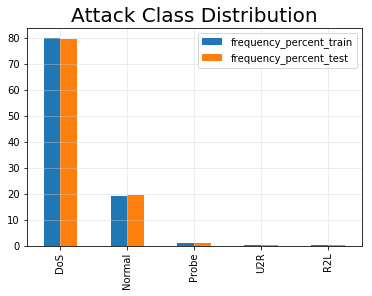

In [25]:
# Attack class bar plot
%matplotlib inline
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


### Scaling Numerical Attributes

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['float64','int64']).columns
scaler.fit(X_train.select_dtypes(include=['float64','int64']))
sc_train = scaler.transform(X_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.transform(X_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = X_train.select_dtypes(include=['object']).copy()
cattest = X_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)



In [28]:
y_train=pd.DataFrame(y_train,columns=['attack_class'])
y_test=pd.DataFrame(y_test,columns=['attack_class'])


In [29]:
y_train.head()

,attack_class
2429001,DoS
3436973,Normal
1527095,DoS
682935,DoS
82058,DoS


In [30]:
y_train=y_train.apply(encoder.fit_transform)
y_test=y_test.apply(encoder.fit_transform)

In [31]:
y_train.head(3)

,attack_class
2429001,0
3436973,1
1527095,0


In [32]:
encoder.inverse_transform([0,1,2,3,4])

array(['DoS', 'Normal', 'Probe', 'R2L', 'U2R'], dtype=object)

In [33]:
sc_traindf.reset_index(drop=True,inplace=True)
traincat.reset_index(drop=True,inplace=True)
sc_testdf.reset_index(drop=True,inplace=True)
testcat.reset_index(drop=True,inplace=True)
X_train=pd.concat([sc_traindf,traincat],axis=1)
X_test=pd.concat([sc_testdf,testcat],axis=1)
# X_train=sc_traindf.append(traincat,sort=False)
# X_test=sc_testdf.append(testcat,sort=False)

### Feature Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train.values.ravel());
# extract important features
score = np.round(rfc.feature_importances_,3)


In [35]:
import matplotlib.pyplot as plt

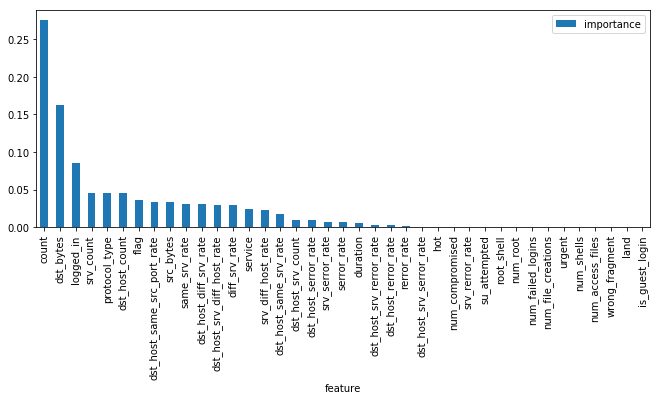

In [36]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [37]:
final_features=list(importances[:20].index)

In [38]:
final_features


['count',
 'dst_bytes',
 'logged_in',
 'srv_count',
 'protocol_type',
 'dst_host_count',
 'flag',
 'dst_host_same_src_port_rate',
 'src_bytes',
 'same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'service',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_serror_rate',
 'srv_serror_rate',
 'serror_rate']

In [39]:
X_train2=X_train.loc[:,final_features]
X_test2=X_test.loc[:,final_features]

In [40]:
X_train2.shape

(69325, 20)

In [41]:
X_train2.describe()

,count,dst_bytes,logged_in,srv_count,protocol_type,dst_host_count,flag,dst_host_same_src_port_rate,src_bytes,same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,diff_srv_rate,service,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_serror_rate,srv_serror_rate,serror_rate
count,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,69325.000000,6.932500e+04,69325.000000,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,69325.000000,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04,6.932500e+04
mean,5.257965e-17,-7.174611e-18,5.370709e-17,-8.917017e-18,0.458478,9.675476e-17,7.051006,1.921130e-16,5.278464e-18,5.534700e-18,-2.536737e-17,2.449617e-17,2.306125e-17,23.131468,-4.304767e-18,5.122672e-16,-2.459867e-17,1.045443e-16,5.821684e-17,-4.263769e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.572530,1.000007e+00,1.889845,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,13.121951,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.590010e+00,-4.331519e-02,-3.997071e-01,-1.203880e+00,0.000000,-3.708962e+00,0.000000,-1.263581e+00,-2.569738e-02,-2.018506e+00,-2.836894e-01,-1.524705e-01,-2.603093e-01,0.000000,-2.000945e-01,-1.822259e+00,-1.776131e+00,-4.679211e-01,-4.674083e-01,-4.675493e-01
25%,-1.011967e+00,-4.331519e-02,-3.997071e-01,-1.163179e+00,0.000000,3.370797e-01,8.000000,-1.263581e+00,-2.476083e-02,5.427695e-01,-2.836894e-01,-1.524705e-01,-2.603093e-01,14.000000,-2.000945e-01,-9.739212e-01,-1.399688e+00,-4.679211e-01,-4.674083e-01,-4.675493e-01
50%,8.216580e-01,-4.331519e-02,-3.997071e-01,8.678190e-01,0.000000,3.370797e-01,8.000000,8.168693e-01,-1.410203e-02,5.427695e-01,-2.836894e-01,-1.524705e-01,-2.603093e-01,14.000000,-2.000945e-01,6.015636e-01,6.236974e-01,-4.679211e-01,-4.674083e-01,-4.675493e-01
75%,8.263961e-01,-4.331519e-02,-3.997071e-01,8.718891e-01,1.000000,3.370797e-01,8.000000,8.168693e-01,-2.685071e-03,5.427695e-01,1.808243e-01,-1.524705e-01,-2.603093e-01,44.000000,-2.000945e-01,6.015636e-01,6.236974e-01,-4.679211e-01,-4.674083e-01,-4.675493e-01
max,8.263961e-01,1.831933e+02,2.501832e+00,8.718891e-01,2.000000,3.370797e-01,9.000000,8.168693e-01,1.616079e+02,5.427695e-01,9.006584e+00,2.348035e+01,1.226977e+01,61.000000,6.933753e+00,6.015636e-01,6.236974e-01,2.144325e+00,2.142311e+00,2.144444e+00


### FITTING THE MODELS

In [42]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train2, y_train.values.ravel()); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(multi_class='auto',n_jobs=-1, random_state=0,solver='lbfgs')
LGR_Classifier.fit(X_train2, y_train.values.ravel());

# Train Gaussian Naive Baye Model
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train2, y_train.values.ravel())
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train2, y_train.values.ravel());
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
#RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
#SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', GNB_Classifier), 
                 ('Decision Tree Classifier', DTC_Classifier), 
                 ('KNeighborsClassifier', KNN_Classifier), 
                 ('LogisticRegression', LGR_Classifier)
                ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train2, y_train.values.ravel());

In [43]:
from sklearn import metrics

models = []
#models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
#models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train2, y_train.values.ravel(), cv=10)
    accuracy = metrics.accuracy_score(y_train.values.ravel(), v.predict(X_train2))
    confusion_matrix = metrics.confusion_matrix(y_train.values.ravel(), v.predict(X_train2))
    classification = metrics.classification_report(y_train.values.ravel(), v.predict(X_train2))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9029788165333862

Model Accuracy:
 0.9012477461233321

Confusion matrix:
 [[52238    31  3074     0     0]
 [  262  9673   917  1012  1505]
 [    3     1   524     0    38]
 [    0     0     0    16     1]
 [    0     0     0     2    28]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     55343
           1       1.00      0.72      0.84     13369
           2       0.12      0.93      0.21       566
           3       0.02      0.94      0.03        17
           4       0.02      0.93      0.03        30

    accuracy                           0.90     69325
   macro avg       0.43      0.89      0.42     69325
weighted avg       0.99      0.90      0.94     69325



============================== Decision Tree Classifier Model Evaluation ==============================

Cros

### EVALUATING ON TEST DATA

In [44]:
for i, v in models:
    accuracy = metrics.accuracy_score(y_test.values.ravel(), v.predict(X_test2))
    confusion_matrix = metrics.confusion_matrix(y_test.values.ravel(), v.predict(X_test2))
    classification = metrics.classification_report(y_test.values.ravel(), v.predict(X_test2))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9103362391033624

Confusion matrix:
 [[22325    19  1349     0     0]
 [  138  4473   413     7   719]
 [    1     0   229     1     7]
 [    0     3     0     0     5]
 [    0     2     0     0    20]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     23693
           1       0.99      0.78      0.87      5750
           2       0.12      0.96      0.21       238
           3       0.00      0.00      0.00         8
           4       0.03      0.91      0.05        22

    accuracy                           0.91     29711
   macro avg       0.43      0.72      0.42     29711
weighted avg       0.99      0.91      0.94     29711



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9994614789135338

Confusion mat

## Decision tree performs best among the selected models with macro f1 score of 0.91